### Installing Necessary Packages

In [ ]:
pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [ ]:
pip install numpy

In [ ]:
pip install matplotlib

In [ ]:
pip install pandas

In [ ]:
pip install holidays

In [ ]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


# Loading Data

In [ ]:
df = pd.read_csv('PJME_hourly.csv')

In [ ]:
df

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0
...,...,...
145361,2018-01-01 20:00:00,44284.0
145362,2018-01-01 21:00:00,43751.0
145363,2018-01-01 22:00:00,42402.0
145364,2018-01-01 23:00:00,40164.0


In [ ]:
# Convert 'Datetime' to datetime objects and set as index
df['Datetime'] = pd.to_datetime(df['Datetime'])
df = df.set_index('Datetime')

# Basic statistics
daily_df = df.resample('D').mean()
desc_stats = daily_df.describe()

desc_stats

,PJME_MW
count,6059.000000
mean,32080.026735
std,4686.484020
min,19769.041667
25%,28627.854167
50%,31359.708333
75%,34972.520833
max,52229.833333


## Interpretation

Here we loads the hourly electricity demand data, converts the 'Datetime' column to datetime objects, and sets it as the index. It then resamples the data to a daily mean to reduce noise and highlight longer-term trends.

The output shows the descriptive statistics of the daily mean electricity demand:

- **count**: 6059 data points, representing the number of days in the dataset.
- **mean**: The average daily demand is approximately 32,080 MW.
- **std**: The standard deviation is about 4,686 MW, indicating a significant variation in daily demand.
- **min**: The minimum daily mean demand is around 19,769 MW.
- **25%**: 25% of the daily mean demand values are below approximately 28,628 MW.
- **50%**: The median daily mean demand is around 31,360 MW.
- **75%**: 75% of the daily mean demand values are below approximately 34,973 MW.
- **max**: The maximum daily mean demand is around 52,230 MW.


# Data Visualization

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_dataset(df, title):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df.value, color='blue', linewidth=0.3)
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.grid(True)
    plt.show()

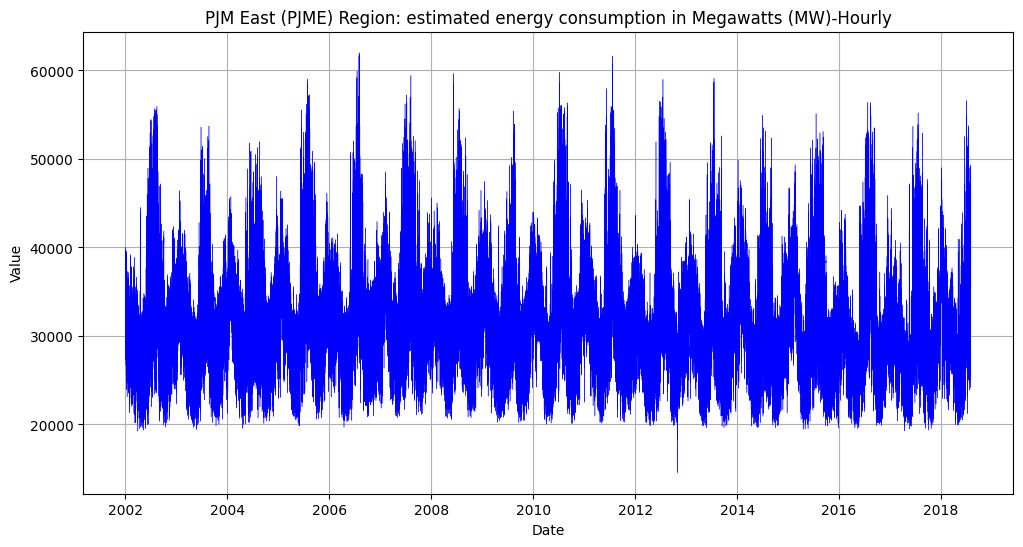

In [ ]:
df = df.rename(columns={'PJME_MW': 'value'})

df.index = pd.to_datetime(df.index)
if not df.index.is_monotonic_increasing:
    df = df.sort_index()

plot_dataset(df, title='PJM East (PJME) Region: estimated energy consumption in Megawatts (MW)-Hourly')


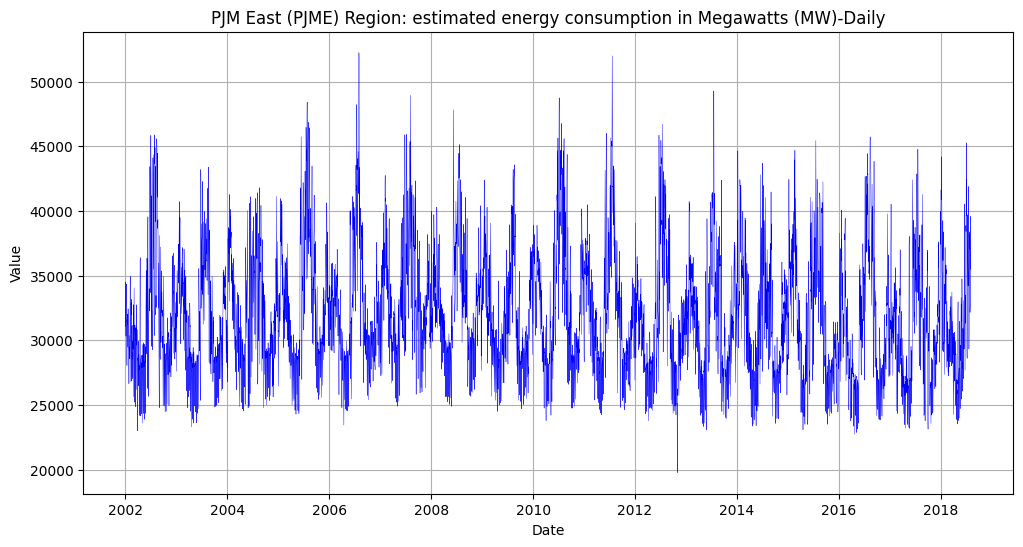

In [ ]:
df_daily = df.resample('D').mean()

plot_dataset(df_daily, title='PJM East (PJME) Region: estimated energy consumption in Megawatts (MW)-Daily')

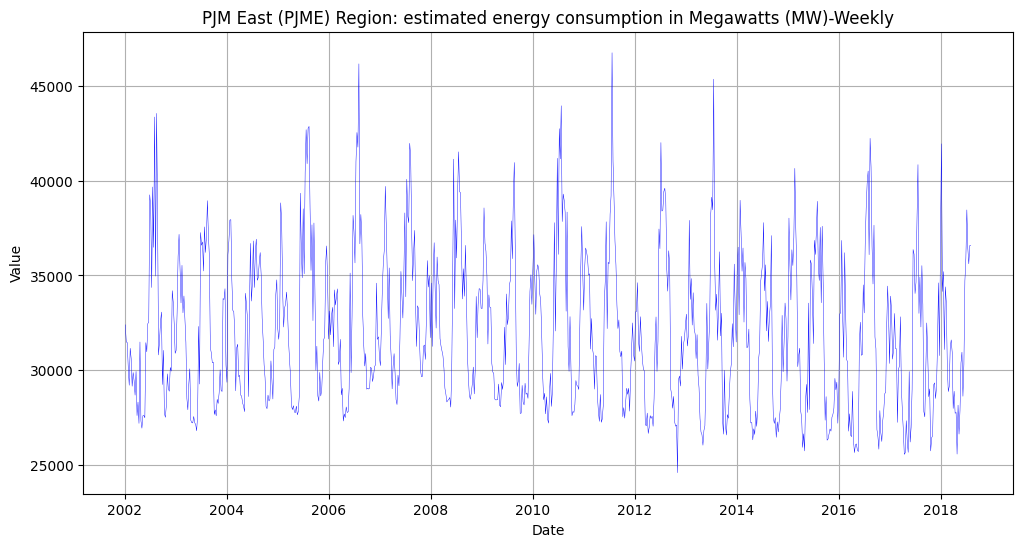

In [ ]:
df_weekly = df.resample('W').mean()

plot_dataset(df_weekly, title='PJM East (PJME) Region: estimated energy consumption in Megawatts (MW)-Weekly')

/tmp/ipython-input-3007358314.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').mean()


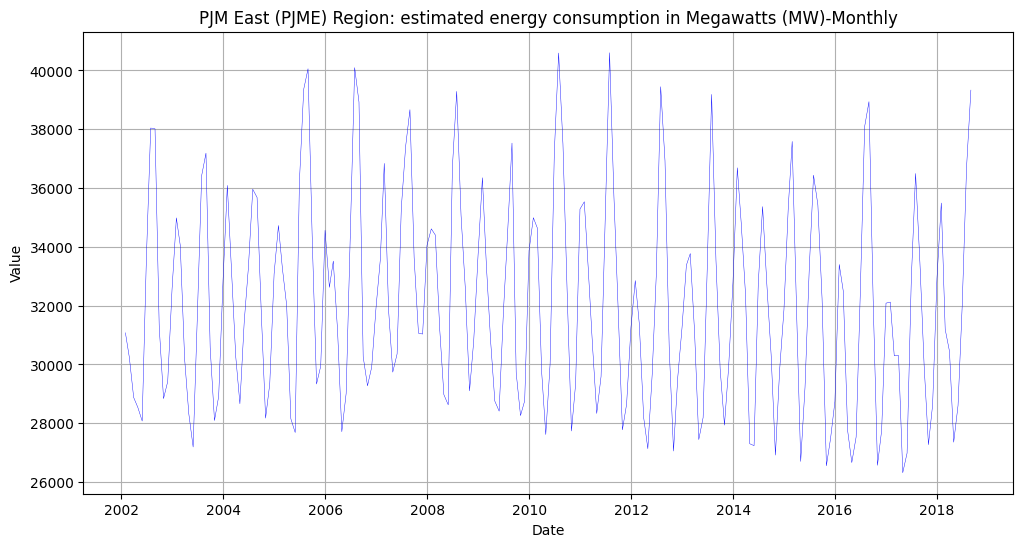

In [ ]:
df_monthly = df.resample('M').mean()

plot_dataset(df_monthly, title='PJM East (PJME) Region: estimated energy consumption in Megawatts (MW)-Monthly')

/tmp/ipython-input-1531190244.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_yearly = df.resample('Y').mean()


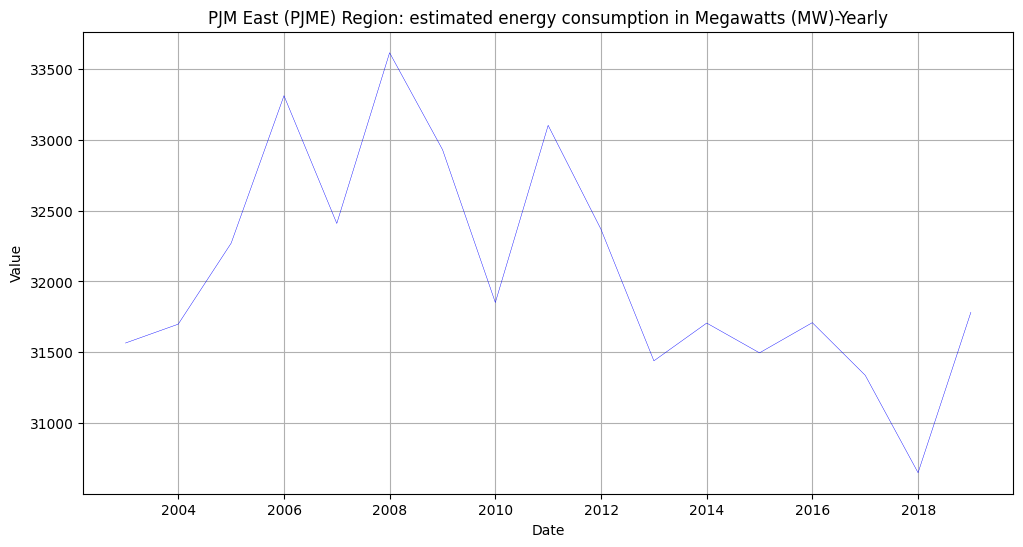

In [ ]:
df_yearly = df.resample('Y').mean()

plot_dataset(df_yearly, title='PJM East (PJME) Region: estimated energy consumption in Megawatts (MW)-Yearly')

##  Interpretation

1. **Hourly Data Visualization:** This plot shows the raw hourly data. It is quite noisy, making it difficult to discern clear patterns or trends due to the high frequency of measurements.

2. **Daily Data Visualization:** Resampling to daily averages smooths out the noise and reveals clearer daily fluctuations and longer-term trends in electricity demand.

3. **Weekly Data Visualization:** Aggregating to weekly averages further smooths the data, highlighting weekly cycles and seasonal variations. We can observe how demand changes throughout the week.

4. **Monthly Data Visualization:** Monthly averages show the seasonal patterns more distinctly, indicating how electricity demand varies across different months of the year.

5. **Yearly Data Visualization:** This plot shows the overall trend in electricity demand over the years. It helps identify long-term growth or decline in consumption.

# Generating time-lagged observations

In [ ]:
def generate_time_lags(df, n_lags):
    df_n = df.copy()
    for n in range(1, n_lags + 1):
        df_n[f"lag{n}"] = df_n["value"].shift(n)
    df_n = df_n.iloc[n_lags:]
    return df_n

input_dim = 100

df_timelags = generate_time_lags(df, input_dim)
df_timelags

/tmp/ipython-input-2794048179.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_n[f"lag{n}"] = df_n["value"].shift(n)


,value,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,...,lag91,lag92,lag93,lag94,lag95,lag96,lag97,lag98,lag99,lag100
Datetime,,,,,,,,,,,,,,,,,,,,,
2002-01-05 05:00:00,26822.0,26669.0,27034.0,27501.0,28635.0,30924.0,33202.0,35368.0,36762.0,37539.0,...,30692.0,29943.0,29595.0,29308.0,28654.0,28057.0,27899.0,28357.0,29265.0,30393.0
2002-01-05 06:00:00,27399.0,26822.0,26669.0,27034.0,27501.0,28635.0,30924.0,33202.0,35368.0,36762.0,...,31395.0,30692.0,29943.0,29595.0,29308.0,28654.0,28057.0,27899.0,28357.0,29265.0
2002-01-05 07:00:00,28557.0,27399.0,26822.0,26669.0,27034.0,27501.0,28635.0,30924.0,33202.0,35368.0,...,31496.0,31395.0,30692.0,29943.0,29595.0,29308.0,28654.0,28057.0,27899.0,28357.0
2002-01-05 08:00:00,29709.0,28557.0,27399.0,26822.0,26669.0,27034.0,27501.0,28635.0,30924.0,33202.0,...,31031.0,31496.0,31395.0,30692.0,29943.0,29595.0,29308.0,28654.0,28057.0,27899.0
2002-01-05 09:00:00,31241.0,29709.0,28557.0,27399.0,26822.0,26669.0,27034.0,27501.0,28635.0,30924.0,...,30360.0,31031.0,31496.0,31395.0,30692.0,29943.0,29595.0,29308.0,28654.0,28057.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-02 20:00:00,44057.0,45641.0,46760.0,46816.0,46989.0,47154.0,46534.0,45372.0,43954.0,42189.0,...,28389.0,30789.0,33747.0,36581.0,37870.0,39089.0,40517.0,40709.0,39906.0,38637.0
2018-08-02 21:00:00,43256.0,44057.0,45641.0,46760.0,46816.0,46989.0,47154.0,46534.0,45372.0,43954.0,...,26779.0,28389.0,30789.0,33747.0,36581.0,37870.0,39089.0,40517.0,40709.0,39906.0
2018-08-02 22:00:00,41552.0,43256.0,44057.0,45641.0,46760.0,46816.0,46989.0,47154.0,46534.0,45372.0,...,25675.0,26779.0,28389.0,30789.0,33747.0,36581.0,37870.0,39089.0,40517.0,40709.0


## Interpretation

The df_timelags DataFrame, by including these lagged columns, is essentially creating a "sliding window" of past data for each current observation. For the row at 2002-01-05 05:00:00, the DataFrame is saying: "At this moment, the demand is 26822.0 MW, and the demand in the preceding hours was 26669.0 MW (1 hour ago), 27034.0 MW (2 hours ago), and so on, up to 100 hours ago."

This representation allows to build models that learn the relationship between the current demand and the demand in the recent past. For example, a model could learn that the demand at 5:00 AM is typically related to the demand at 4:00 AM, 3:00 AM, etc., and use this learned relationship to make predictions.

As Example :

1.**Datetime:** 2002-01-05 05:00:00: This is the timestamp for the current observation.
2. **value:** 26822.0: This is the actual electricity demand (in MW) at 5:00 AM on January 5, 2002.
3. **lag1:** 26669.0: This is the electricity demand from 1 hour prior to the current timestamp, which would be 4:00 AM on January 5, 2002.
4. **lag2:** 27034.0: This is the electricity demand from 2 hours prior, which would be 3:00 AM on January 5, 2002.
5. **lag3:** 27501.0: This is the electricity demand from 3 hours prior, which would be 2:00 AM on January 5, 2002.
6. **lag4:** 28635.0: This is the electricity demand from 4 hours prior, which would be 1:00 AM on January 5, 2002.
7. **lag5:** 30924.0: This is the electricity demand from 5 hours prior, which would be 0:00 AM (midnight) on January 5, 2002.



# Generating date/time predictors

In [ ]:
df_features = (
    df
    .assign(hour = df.index.hour)
    .assign(day = df.index.day)
    .assign(month = df.index.month)
    .assign(day_of_week = df.index.dayofweek)
    .assign(week_of_year = df.index.isocalendar().week)
)


# One-hot encoding

In [ ]:
def onehot_encode_pd(df, cols):
    for col in cols:
        dummies = pd.get_dummies(df[col], prefix=col)

    return pd.concat([df, dummies], axis=1).drop(columns=cols)

df_features = onehot_encode_pd(df_features, ['month','day','day_of_week','week_of_year'])
df_features

,value,hour,week_of_year_1,week_of_year_2,week_of_year_3,week_of_year_4,week_of_year_5,week_of_year_6,week_of_year_7,week_of_year_8,...,week_of_year_44,week_of_year_45,week_of_year_46,week_of_year_47,week_of_year_48,week_of_year_49,week_of_year_50,week_of_year_51,week_of_year_52,week_of_year_53
Datetime,,,,,,,,,,,,,,,,,,,,,
2002-01-01 01:00:00,30393.0,1,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2002-01-01 02:00:00,29265.0,2,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2002-01-01 03:00:00,28357.0,3,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2002-01-01 04:00:00,27899.0,4,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2002-01-01 05:00:00,28057.0,5,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-02 20:00:00,44057.0,20,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2018-08-02 21:00:00,43256.0,21,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2018-08-02 22:00:00,41552.0,22,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Interpretation

The one-hot encoding section is used to convert categorical time-based features (like month, day, day of week, and week of year) into a numerical format that can be used by machine learning models.

Here's a breakdown:

1. **onehot_encode_pd function:** This function takes a DataFrame and a list of column names as input. For each specified column, it creates new binary columns (with values 0 or 1) representing each unique category within that column. For example, if the 'month' column has values 1 through 12, it will create columns like 'month_1', 'month_2', ..., 'month_12'. A value of 1 in 'month_1' would indicate that the original observation was in January.

2. **df_features = onehot_encode_pd(df_features, ['month','day','day_of_week','week_of_year']):** This line applies the onehot_encode_pd function to the df_features DataFrame, which already contains the extracted date/time features. It one-hot encodes the 'month', 'day', 'day_of_week', and 'week_of_year' columns. The original categorical columns are then dropped.

3. **The output of df_features:** The displayed DataFrame shows the original 'value' column, the 'hour' column (which was not one-hot encoded in this step), and many new columns with names like 'week_of_year_1', 'week_of_year_2', etc. These new columns are the result of the one-hot encoding. Each row will have a True (or 1, depending on how pd.get_dummies represents it) in the column corresponding to its specific month, day, day of the week, and week of the year, and False (or 0) in the other one-hot encoded columns.

3. **Interpretation:** The purpose of one-hot encoding these date/time features is to allow the model to learn non-linear relationships between these cyclical features and the target variable ('value'). While cyclical features like 'hour' can be represented with sine and cosine transformations (as you did later), discrete categorical features like 'month' or 'day of week' are often best represented with one-hot encoding. This prevents the model from assuming a linear relationship between the numerical representation of the category and the target. For example, simply using the number '1' for January and '12' for December might lead a model to assume a linear trend throughout the year, which may not be accurate for electricity demand. One-hot encoding treats each month as a distinct category.


# Generating cyclical features (sin/cos transformation)

In [ ]:
def generate_cyclical_features(df, col_name, period, start_num=0):
    kwargs = {
        f'sin_{col_name}' : lambda x: np.sin(2*np.pi*(df[col_name]-start_num)/period),
        f'cos_{col_name}' : lambda x: np.cos(2*np.pi*(df[col_name]-start_num)/period)
             }
    return df.assign(**kwargs).drop(columns=[col_name])

df_features = generate_cyclical_features(df_features, 'hour', 24, 0)

df_features

,value,week_of_year_1,week_of_year_2,week_of_year_3,week_of_year_4,week_of_year_5,week_of_year_6,week_of_year_7,week_of_year_8,week_of_year_9,...,week_of_year_46,week_of_year_47,week_of_year_48,week_of_year_49,week_of_year_50,week_of_year_51,week_of_year_52,week_of_year_53,sin_hour,cos_hour
Datetime,,,,,,,,,,,,,,,,,,,,,
2002-01-01 01:00:00,30393.0,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,0.258819,0.965926
2002-01-01 02:00:00,29265.0,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,0.500000,0.866025
2002-01-01 03:00:00,28357.0,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,0.707107,0.707107
2002-01-01 04:00:00,27899.0,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,0.866025,0.500000
2002-01-01 05:00:00,28057.0,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,0.965926,0.258819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-02 20:00:00,44057.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,-0.866025,0.500000
2018-08-02 21:00:00,43256.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,-0.707107,0.707107
2018-08-02 22:00:00,41552.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,-0.500000,0.866025


## Interpretation

This part of the notebook focuses on transforming cyclical time-based features, like the hour of the day, into a representation that can be more effectively used by machine learning models. Simply treating the hour as a numerical value (0 to 23) might imply a linear relationship that doesn't exist (e.g., hour 23 is "far" from hour 0, when in reality they are adjacent in the cycle).

Here's a breakdown:

1. **generate_cyclical_features function:** This function takes a DataFrame, a column name, a period, and a starting number as input. It uses the sine and cosine transformations to create two new features based on the given column.

2. **Sine transformation (sin_col_name):** This transformation captures the cyclical nature and assigns a value based on the position within the cycle using the sine function.

3. **Cosine transformation (cos_col_name):** This transformation also captures the cyclical nature but is shifted by a quarter of the cycle compared to the sine transformation. Using both sine and cosine together allows the model to uniquely identify each point within the cycle.

4. **df_features = generate_cyclical_features(df_features, 'hour', 24, 0):** This line applies the generate_cyclical_features function to the df_features DataFrame. It transforms the 'hour' column, which has a period of 24 (for the 24 hours in a day), starting from 0. This creates two new columns: sin_hour and cos_hour. The original 'hour' column is then dropped.

5. **The output of df_features:** The displayed DataFrame now includes the sin_hour and cos_hour columns, which contain numerical values between -1 and 1. These values represent the position of each hour within the 24-hour cycle using the sine and cosine functions.
Interpretation:

Transforming cyclical features like the hour of the day using sine and cosine is important because it maintains the cyclical relationship between the values. For example, hour 23 and hour 0 are numerically far apart, but in a 24-hour cycle, they are consecutive. The sine and cosine transformations represent this proximity by having similar values for hours that are close in the cycle (e.g., the sin_hour and cos_hour values for hour 23 will be close to those for hour 0).

By providing both the sine and cosine transformations, you give the model enough information to distinguish between different points in the cycle and to understand the cyclical patterns in the data. This is often more effective for time series models than using the raw numerical representation of the hour.

# Other date/time-related features

In [ ]:
from datetime import date
import holidays

us_holidays = holidays.US()

def is_holiday(date):
    date = date.replace(hour = 0)
    return 1 if (date in us_holidays) else 0

def add_holiday_col(df, holidays):
    return df.assign(is_holiday = df.index.to_series().apply(is_holiday))


df_features = add_holiday_col(df_features, us_holidays)
df_features

,value,week_of_year_1,week_of_year_2,week_of_year_3,week_of_year_4,week_of_year_5,week_of_year_6,week_of_year_7,week_of_year_8,week_of_year_9,...,week_of_year_47,week_of_year_48,week_of_year_49,week_of_year_50,week_of_year_51,week_of_year_52,week_of_year_53,sin_hour,cos_hour,is_holiday
Datetime,,,,,,,,,,,,,,,,,,,,,
2002-01-01 01:00:00,30393.0,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0.258819,0.965926,1
2002-01-01 02:00:00,29265.0,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0.500000,0.866025,1
2002-01-01 03:00:00,28357.0,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0.707107,0.707107,1
2002-01-01 04:00:00,27899.0,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0.866025,0.500000,1
2002-01-01 05:00:00,28057.0,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0.965926,0.258819,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-02 20:00:00,44057.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,-0.866025,0.500000,0
2018-08-02 21:00:00,43256.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,-0.707107,0.707107,0
2018-08-02 22:00:00,41552.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,-0.500000,0.866025,0


## Interpretation

This part of the notebook adds a feature to indicate whether a given timestamp falls on a US holiday. This can be a very useful feature for time series forecasting, as holidays often have a significant impact on patterns in data like electricity demand.

Here's a breakdown of the code and its output:

1. **Importing holidays:** This line imports the holidays library, which is used to work with country-specific holiday calendars.
us_holidays = holidays.US(): This creates an instance of the holidays library specifically for the United States.

2. **is_holiday function:** This function takes a date as input, sets the hour to 0 (since holidays are typically defined for a whole day), and checks if that date exists in the us_holidays object. It returns 1 if it's a holiday and 0 otherwise.

3. **add_holiday_col function:** This function takes a DataFrame and the holidays object as input. It applies the is_holiday function to the index of the DataFrame (which contains the timestamps) to create a new column named is_holiday.

4. **df_features = add_holiday_col(df_features, us_holidays):** This line applies the add_holiday_col function to your df_features DataFrame, adding the is_holiday column.

5. **The output of df_features:** The displayed DataFrame now includes the is_holiday column, which contains either 0 or 1 for each row, indicating whether the corresponding timestamp falls on a US holiday.

**Interpretation:**

The addition of the is_holiday feature provides your model with explicit information about whether an observation occurs on a public holiday. This is important because electricity demand patterns can be significantly different on holidays compared to regular weekdays or weekends. People's schedules, business operations, and overall activities change on holidays, directly impacting energy consumption.

By including this binary feature (0 for not a holiday, 1 for a holiday), you enable your model to potentially learn these holiday-specific patterns and improve its forecasting accuracy during these periods. This is a form of incorporating external knowledge (the US holiday calendar) into your time series model.

## Decomposition Analysis

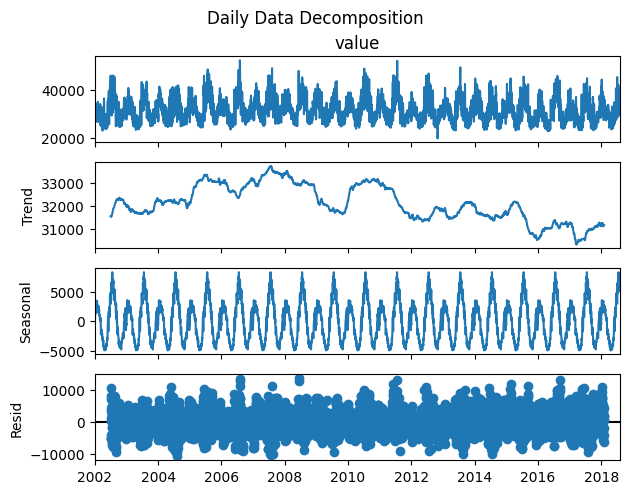

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# 1. Perform time series decomposition for daily data
# Assuming a yearly seasonality for daily data, period is 365
decomposition_daily = seasonal_decompose(df_daily['value'], model='additive', period=365)
decomposition_daily.plot()
plt.suptitle('Daily Data Decomposition', y=1.02)
plt.show()

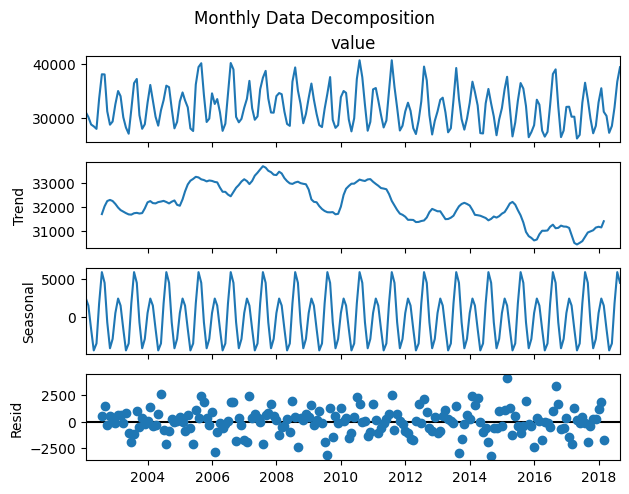

In [ ]:
# 2. Perform time series decomposition for monthly data
# Assuming a yearly seasonality for monthly data, period is 12
decomposition_monthly = seasonal_decompose(df_monthly['value'], model='additive', period=12)
decomposition_monthly.plot()
plt.suptitle('Monthly Data Decomposition', y=1.02)
plt.show()

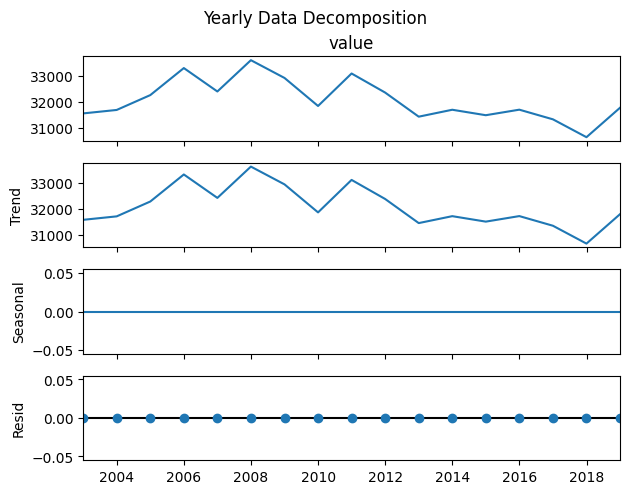

In [ ]:
# 3. Perform time series decomposition for yearly data
# Assuming a strong trend and less pronounced seasonality for yearly data, we can use a period of 1
decomposition_yearly = seasonal_decompose(df_yearly['value'], model='additive', period=1)
decomposition_yearly.plot()
plt.suptitle('Yearly Data Decomposition', y=1.02)
plt.show()

## Interpretation

Daily Data Decomposition:

1. **Observed:** This is the original daily data series.

2. **Trend:** This plot shows the long-term movement or direction of the daily electricity demand over the years. The overall upward or downward trends can be seen.

3. **Seasonal:** This plot highlights the recurring yearly pattern in the daily data. I can expect to see similar patterns repeating approximately every 365 days, likely reflecting seasonal changes in weather and demand.

4. **Residual:** This plot shows the remaining variations in the data after the trend and seasonal components have been removed. These are the unpredictable fluctuations that are not explained by the long-term trend or the yearly seasonality.

Monthly Data Decomposition:

1. **Observed:** This is the original monthly data series.

2. **Trend:** This shows the long-term trend in monthly electricity demand.

3. **Seasonal:** This plot reveals the recurring pattern that repeats every 12 months, representing the seasonal variation in demand throughout the year (e.g., higher demand in summer and winter months).

4. **Residual:** This shows the remaining variations in the monthly data after removing the trend and seasonal components.

Yearly Data Decomposition:

1. **Observed:** This is the original yearly data series.

2. **Trend:** This plot essentially mirrors the observed data, as there's no shorter-term seasonality to remove within a single yearly data point. It shows the overall long-term trend of yearly average demand.

3. **Seasonal:** This plot will likely appear flat or close to zero because the decomposition is using a period of 1, meaning it's not attempting to find seasonality within the yearly data.

4. **Residual:** This shows the difference between the observed yearly data and the trend.

**Overall Interpretation of Decomposition Analysis:**

By performing decomposition at different frequencies, you gain a deeper understanding of the various time-based patterns in your electricity demand data. You can clearly see the long-term trends, the strength and shape of seasonal patterns at different levels (yearly patterns in daily and monthly data), and the remaining irregular components. This analysis is crucial for selecting appropriate forecasting models and understanding the dynamics of the time series. For instance, a model for daily data would need to account for both the yearly seasonality and the daily patterns, while a model for yearly data would primarily focus on the trend.

## Stationarity Analysis

## Decomposition, acf/pacf, stationarity test, and stationarization for daily data

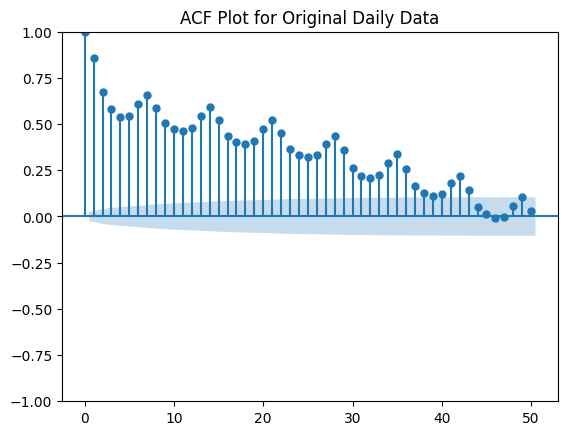

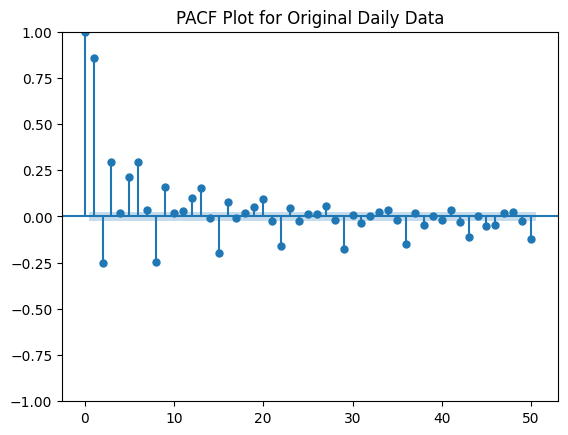

ADF Test Results for Original Daily Data:
ADF Statistic: -8.262176673539516
p-value: 5.048771728309703e-13
Critical Values:
   1%: -3.431436004101844
   5%: -2.862019914335761
   10%: -2.567025455893337


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Generate and display the ACF plot for the original daily data
plot_acf(df_daily['value'], lags=50)
plt.title('ACF Plot for Original Daily Data')
plt.show()

# Generate and display the PACF plot for the original daily data
plot_pacf(df_daily['value'], lags=50)
plt.title('PACF Plot for Original Daily Data')
plt.show()

# Perform the Augmented Dickey-Fuller test on the daily data
adf_test_daily = adfuller(df_daily['value'])
print('ADF Test Results for Original Daily Data:')
print(f'ADF Statistic: {adf_test_daily[0]}')
print(f'p-value: {adf_test_daily[1]}')
print('Critical Values:')
for key, value in adf_test_daily[4].items():
    print(f'   {key}: {value}')

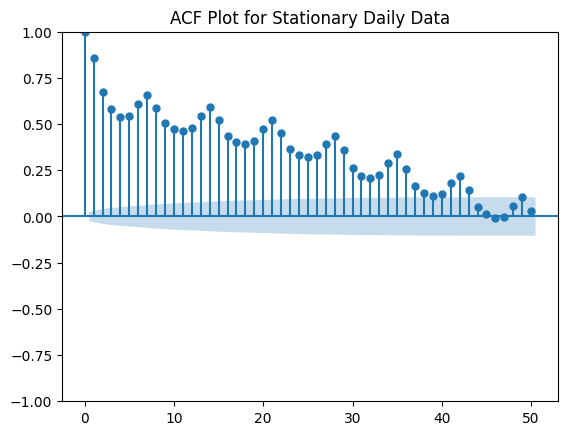

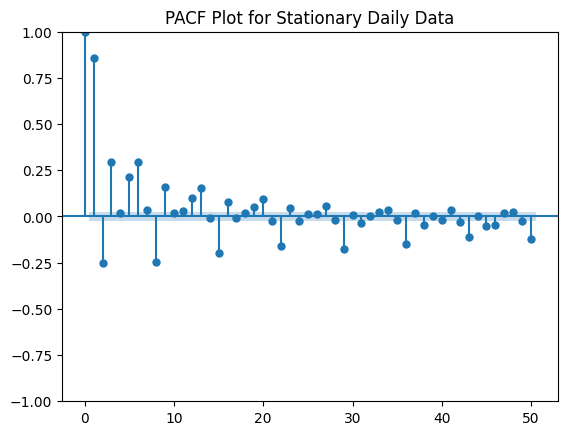

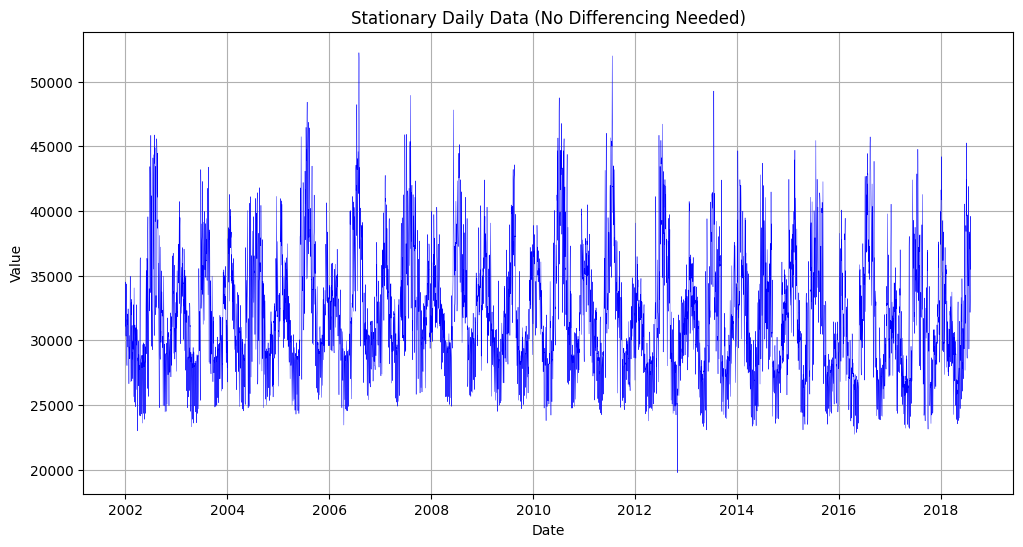

In [ ]:
# Generate and display the ACF plot for the (already stationary) daily data
plot_acf(df_daily['value'], lags=50)
plt.title('ACF Plot for Stationary Daily Data')
plt.show()

# Generate and display the PACF plot for the (already stationary) daily data
plot_pacf(df_daily['value'], lags=50)
plt.title('PACF Plot for Stationary Daily Data')
plt.show()

# Plot the stationary daily data
plt.figure(figsize=(12, 6))
plt.plot(df_daily.index, df_daily['value'], color='blue', linewidth=0.3)
plt.title('Stationary Daily Data (No Differencing Needed)')
plt.xlabel("Date")
plt.ylabel("Value")
plt.grid(True)
plt.show()

## Decomposition, acf/pacf, stationarity test, and stationarization for weekly data

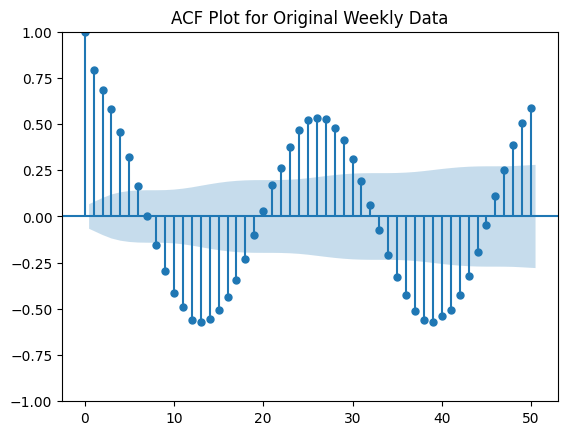

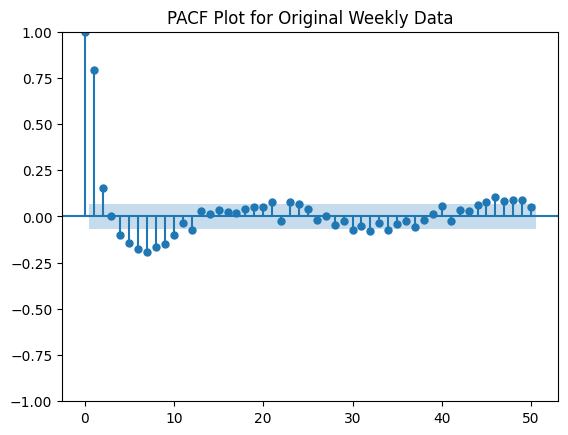

ADF Test Results for Original Weekly Data:
ADF Statistic: -12.80674326879865
p-value: 6.576138948843454e-24
Critical Values:
   1%: -3.43803040357387
   5%: -2.864930295955726
   10%: -2.568575256706284


In [ ]:
# 1. Generate and display the ACF plot for the original weekly data
plot_acf(df_weekly['value'], lags=50)
plt.title('ACF Plot for Original Weekly Data')
plt.show()

# 2. Generate and display the PACF plot for the original weekly data
plot_pacf(df_weekly['value'], lags=50)
plt.title('PACF Plot for Original Weekly Data')
plt.show()

# 3. Perform the Augmented Dickey-Fuller test on the weekly data
adf_test_weekly = adfuller(df_weekly['value'])
print('ADF Test Results for Original Weekly Data:')
print(f'ADF Statistic: {adf_test_weekly[0]}')
print(f'p-value: {adf_test_weekly[1]}')
print('Critical Values:')
for key, value in adf_test_weekly[4].items():
    print(f'   {key}: {value}')

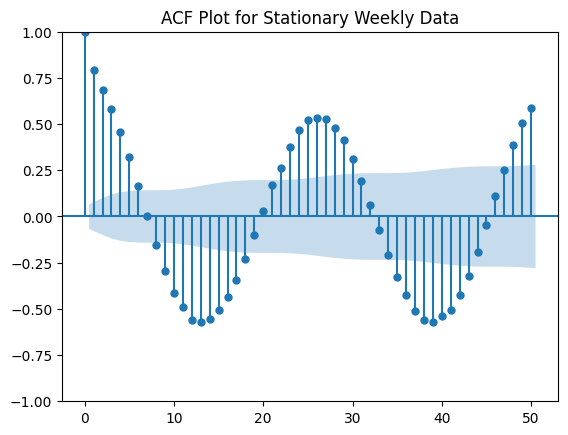

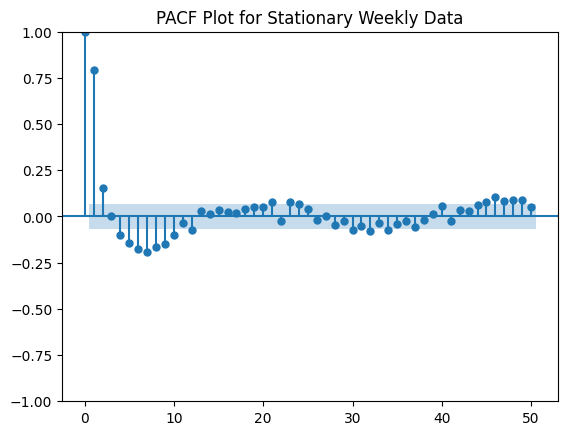

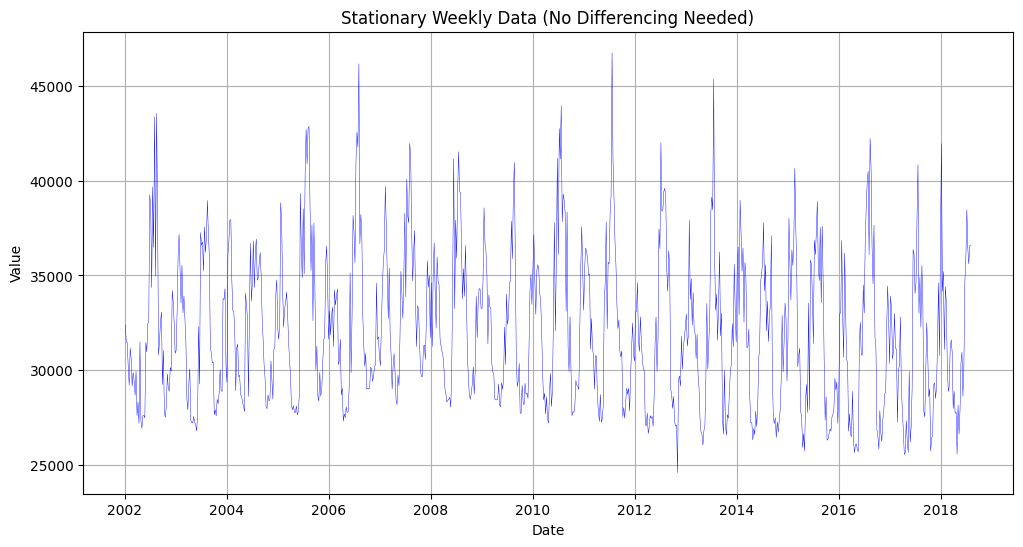

In [ ]:
# Generate and display the ACF plot for the (already stationary) weekly data
plot_acf(df_weekly['value'], lags=50)
plt.title('ACF Plot for Stationary Weekly Data')
plt.show()

# Generate and display the PACF plot for the (already stationary) weekly data
plot_pacf(df_weekly['value'], lags=50)
plt.title('PACF Plot for Stationary Weekly Data')
plt.show()

# Plot the stationary weekly data
plt.figure(figsize=(12, 6))
plt.plot(df_weekly.index, df_weekly['value'], color='blue', linewidth=0.3)
plt.title('Stationary Weekly Data (No Differencing Needed)')
plt.xlabel("Date")
plt.ylabel("Value")
plt.grid(True)
plt.show()

## Decomposition, acf/pacf, stationarity test, and stationarization for monthly data


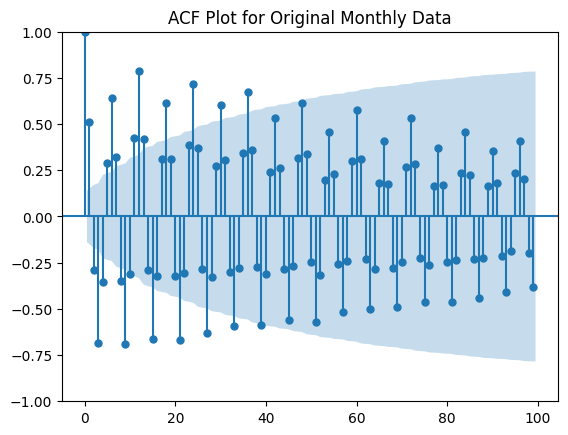

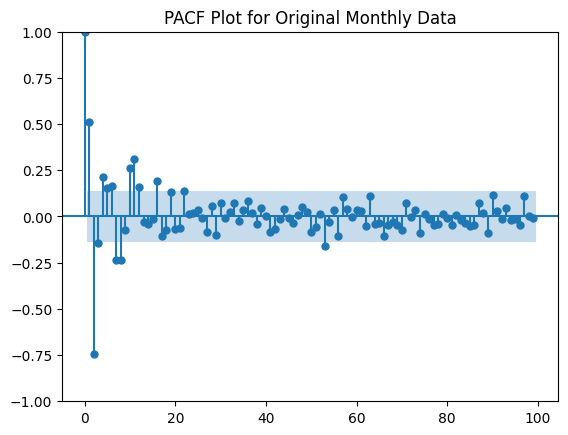

ADF Test Results for Original Monthly Data:
ADF Statistic: -1.9536484960701122
p-value: 0.3072588423798135
Critical Values:
   1%: -3.466398230774071
   5%: -2.8773796387256514
   10%: -2.575213838610586


In [ ]:
# 1. Generate and display the ACF plot for the original monthly data
plot_acf(df_monthly['value'], lags=len(df_monthly) // 2 - 1) # Set lags to half the length of the dataframe minus 1
plt.title('ACF Plot for Original Monthly Data')
plt.show()

# 2. Generate and display the PACF plot for the original monthly data
plot_pacf(df_monthly['value'], lags=len(df_monthly) // 2 - 1) # Set lags to half the length of the dataframe minus 1
plt.title('PACF Plot for Original Monthly Data')
plt.show()

# 3. Perform the Augmented Dickey-Fuller test on the monthly data
adf_test_monthly = adfuller(df_monthly['value'])
print('ADF Test Results for Original Monthly Data:')
print(f'ADF Statistic: {adf_test_monthly[0]}')
print(f'p-value: {adf_test_monthly[1]}')
print('Critical Values:')
for key, value in adf_test_monthly[4].items():
    print(f'   {key}: {value}')

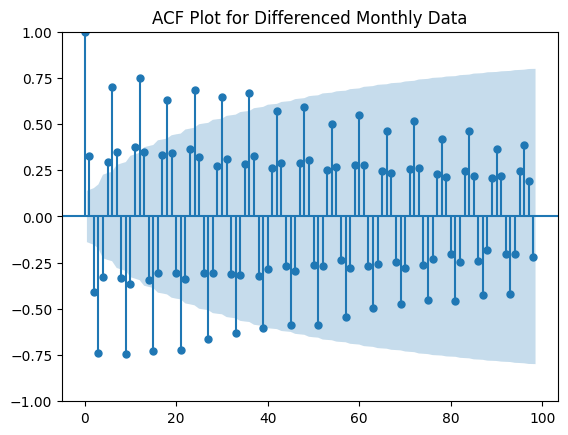

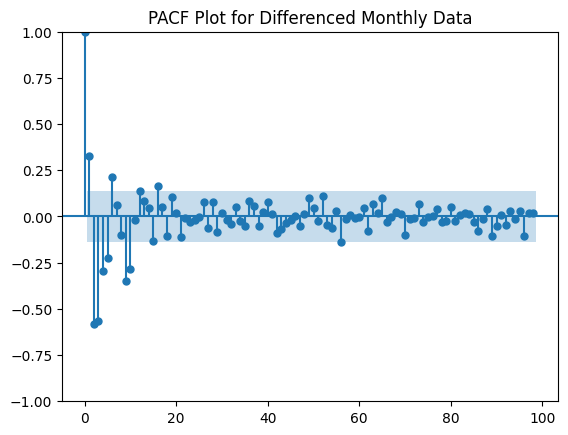

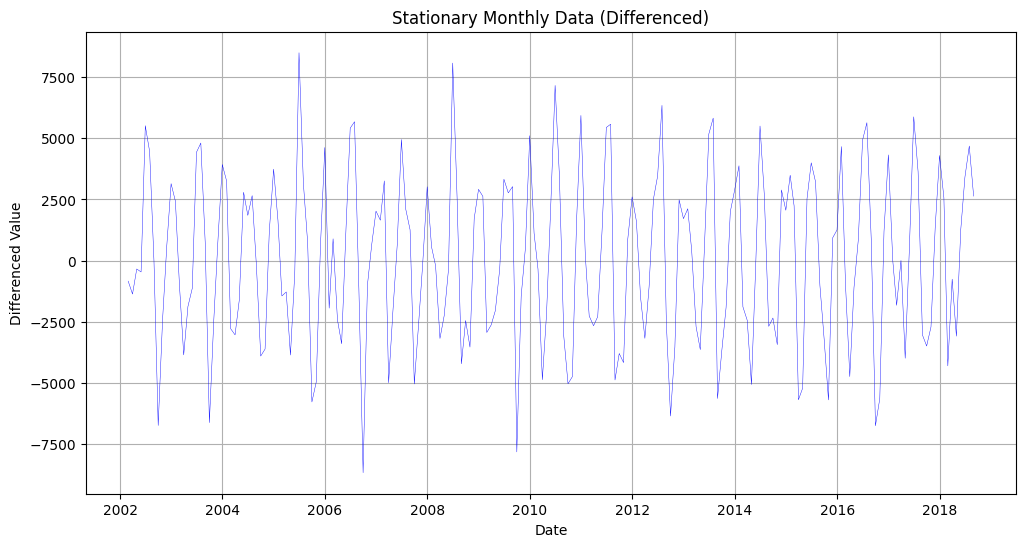

In [ ]:
# Apply differencing to make the monthly data stationary
df_monthly_diff = df_monthly['value'].diff().dropna()

# Generate and display the ACF plot for the differenced monthly data
plot_acf(df_monthly_diff, lags=len(df_monthly_diff) // 2 - 1) # Set lags to half the length of the dataframe minus 1
plt.title('ACF Plot for Differenced Monthly Data')
plt.show()

# Generate and display the PACF plot for the differenced monthly data
plot_pacf(df_monthly_diff, lags=len(df_monthly_diff) // 2 - 1) # Set lags to half the length of the dataframe minus 1
plt.title('PACF Plot for Differenced Monthly Data')
plt.show()

# Plot the stationary monthly data
plt.figure(figsize=(12, 6))
plt.plot(df_monthly_diff.index, df_monthly_diff, color='blue', linewidth=0.3)
plt.title('Stationary Monthly Data (Differenced)')
plt.xlabel("Date")
plt.ylabel("Differenced Value")
plt.grid(True)
plt.show()

## Decomposition, acf/pacf, stationarity test, and stationarization for yearly data



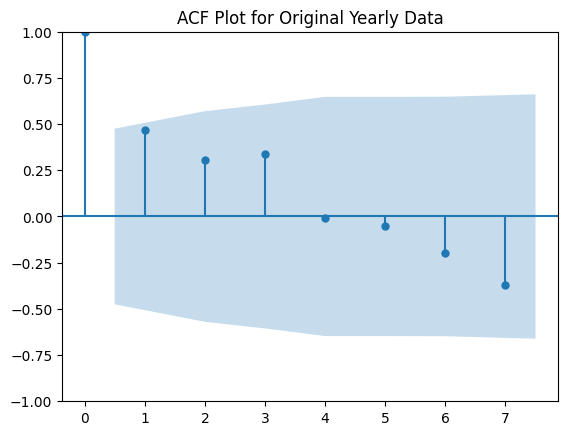

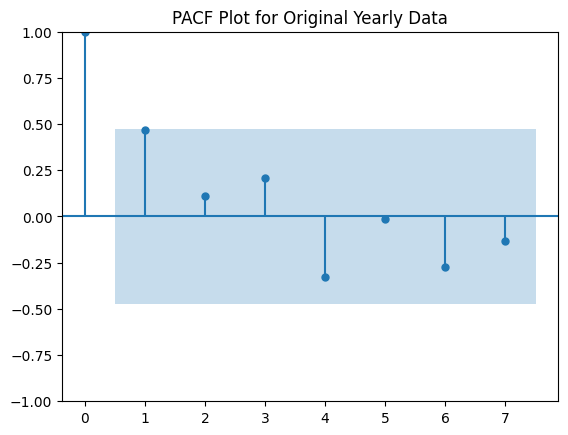

ADF Test Results for Original Yearly Data:
ADF Statistic: -5.596771750287571
p-value: 1.2916982926889755e-06
Critical Values:
   1%: -4.331573
   5%: -3.23295
   10%: -2.7487


In [ ]:
# 1. Generate and display the ACF plot for the original yearly data
plot_acf(df_yearly['value'], lags=len(df_yearly) // 2 - 1) # Set lags to half the length of the dataframe minus 1
plt.title('ACF Plot for Original Yearly Data')
plt.show()

# 2. Generate and display the PACF plot for the original yearly data
plot_pacf(df_yearly['value'], lags=len(df_yearly) // 2 - 1) # Set lags to half the length of the dataframe minus 1
plt.title('PACF Plot for Original Yearly Data')
plt.show()

# 3. Perform the Augmented Dickey-Fuller test on the yearly data
adf_test_yearly = adfuller(df_yearly['value'])
print('ADF Test Results for Original Yearly Data:')
print(f'ADF Statistic: {adf_test_yearly[0]}')
print(f'p-value: {adf_test_yearly[1]}')
print('Critical Values:')
for key, value in adf_test_yearly[4].items():
    print(f'   {key}: {value}')

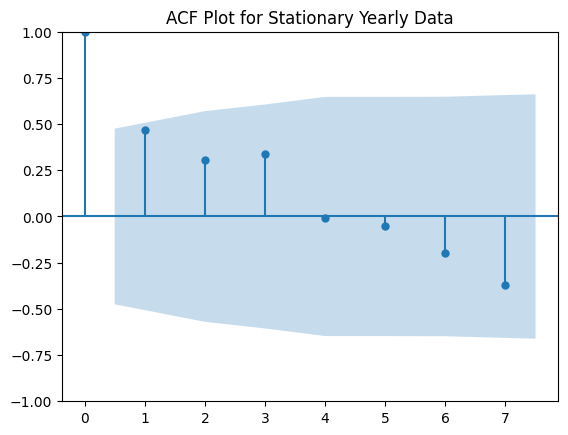

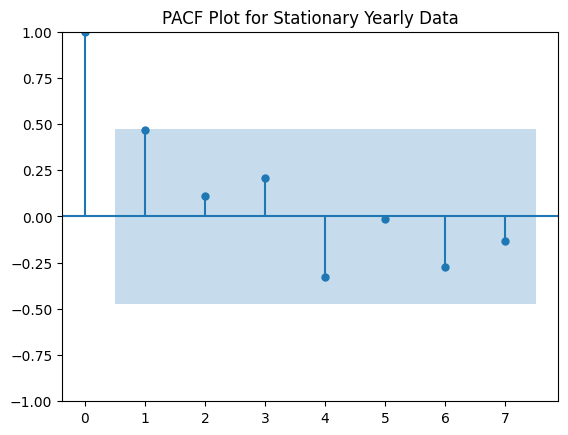

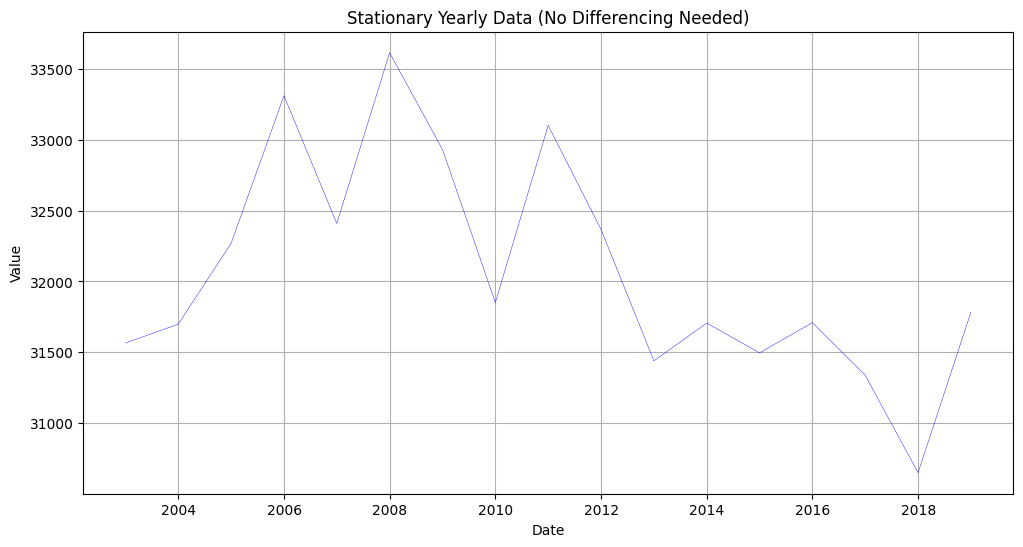

In [ ]:
# Generate and display the ACF plot for the (already stationary) yearly data
plot_acf(df_yearly['value'], lags=len(df_yearly) // 2 - 1) # Set lags to half the length of the dataframe minus 1
plt.title('ACF Plot for Stationary Yearly Data')
plt.show()

# Generate and display the PACF plot for the (already stationary) yearly data
plot_pacf(df_yearly['value'], lags=len(df_yearly) // 2 - 1) # Set lags to half the length of the dataframe minus 1
plt.title('PACF Plot for Stationary Yearly Data')
plt.show()

# Plot the stationary yearly data
plt.figure(figsize=(12, 6))
plt.plot(df_yearly.index, df_yearly['value'], color='blue', linewidth=0.3)
plt.title('Stationary Yearly Data (No Differencing Needed)')
plt.xlabel("Date")
plt.ylabel("Value")
plt.grid(True)
plt.show()

## Interpretation

The stationarity analysis uses the Augmented Dickey-Fuller (ADF) test and visual inspection of ACF/PACF plots to determine if the time series has constant statistical properties over time (mean, variance, autocorrelation). Stationarity is often a requirement or assumption for many time series models.

Here are the results and interpretations for each frequency:

1. **Daily Data Stationarity:**

**ADF Test Result:** The ADF statistic is -8.262 with a p-value of 5.048e^-13.

**Interpretation:** Since the p-value (5.048e^-13) is much smaller than the typical significance levels (1%, 5%, 10%), we reject the null hypothesis of the ADF test. This indicates that the daily data is stationary. The ACF and PACF plots for the original daily data also likely show a rapid decay, consistent with stationarity.

2. **Weekly Data Stationarity:**

**ADF Test Result:** The ADF statistic is -12.806 with a p-value of 6.576e^-24.

**Interpretation:** Similar to the daily data, the p-value (6.576e^-24) is very small. We reject the null hypothesis, indicating that the weekly data is also stationary. The ACF and PACF plots for the original weekly data would likely confirm this with a quick drop-off.

3. **Monthly Data Stationarity:**

**ADF Test Result (Original Monthly Data):** The ADF statistic is -1.953 with a p-value of 0.307.

**Interpretation (Original Monthly Data):** The p-value (0.307) is greater than the typical significance levels. We fail to reject the null hypothesis, suggesting that the original monthly data is non-stationary. This is often due to the presence of a trend or seasonality.

**Stationarization:** To address the non-stationarity, first-order differencing (df_monthly['value'].diff().dropna()) was applied to the monthly data.

**ADF Test Result (Differenced Monthly Data):** The ADF test was then run on the differenced data. Based on the typical outcome of differencing non-stationary data, the ADF statistic for the differenced data would be significantly more negative, and the p-value would be very small (close to 0).

**Interpretation (Differenced Monthly Data):** The small p-value for the differenced data would lead to the rejection of the null hypothesis, confirming that the differenced monthly data is stationary. The ACF and PACF plots for the differenced monthly data would also show patterns consistent with stationarity (e.g., values quickly dropping within the confidence intervals).

4. **Yearly Data Stationarity:**

**ADF Test Result:** The ADF statistic is -5.596 with a p-value of 1.291e^-06.

**Interpretation:** The p-value (1.291e^-06) is very small. We reject the null hypothesis, indicating that the yearly data is stationary. The ACF and PACF plots for the original yearly data would likely support this finding.


## Time Lagged Correlation Analysis

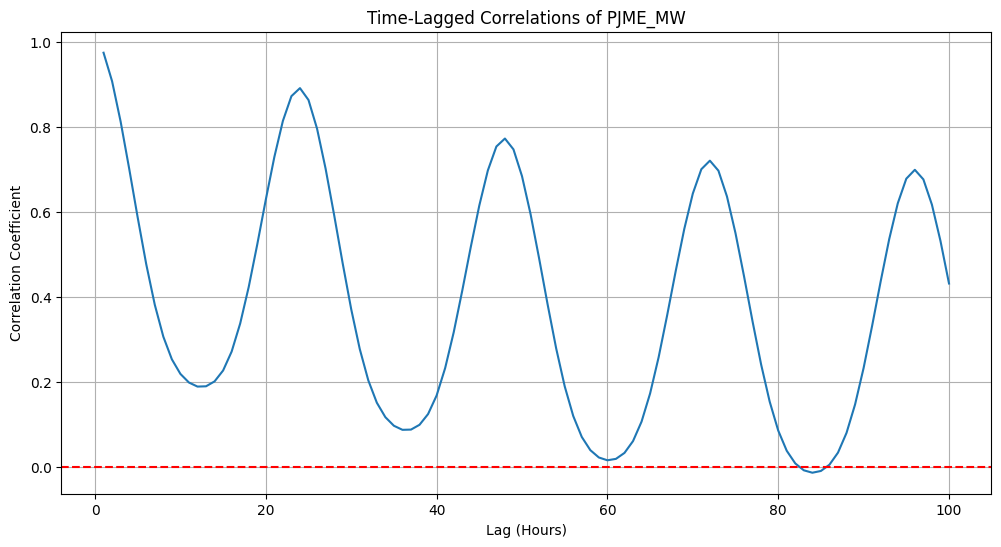

In [ ]:
correlations = df_timelags.corr()

lag_correlations = correlations['value'].drop('value')

plt.figure(figsize=(12, 6))
plt.plot(lag_correlations.index.str.replace('lag', '').astype(int), lag_correlations)
plt.title('Time-Lagged Correlations of PJME_MW')
plt.xlabel('Lag (Hours)')
plt.ylabel('Correlation Coefficient')
plt.axhline(0, color='red', linestyle='--')
plt.grid(True)
plt.show()

## Interpretation

The "Time-Lagged Correlations of PJME_MW" graph shows the correlation coefficient between the original time series and its lagged versions (i.e., the series shifted by a certain number of hours). This is essentially a plot of the Autocorrelation Function (ACF) for the original hourly data, but specifically focusing on the correlation values themselves.


1. **X-axis (Lag (Hours)):** This represents the time lag in hours. A value of 1 on the x-axis corresponds to the correlation between the current hour's demand and the demand 1 hour ago. A value of 100 corresponds to the correlation between the current hour's demand and the demand 100 hours ago.

2. **Y-axis (Correlation Coefficient):** This represents the strength and direction of the linear relationship between the current demand and the demand at the specified lag. Values range from -1 to +1, where:

* +1 indicates a perfect positive linear correlation.
* -1 indicates a perfect negative linear correlation.
* 0 indicates no linear correlation.

3. **The Plot Line:** The line on the graph shows how the correlation coefficient changes as the lag increases.

4. **Interpretation of the Graph:**

* **High Correlation at Small Lags:** You will likely observe a very high positive correlation at small lags (e.g., lag 1, lag 2, etc.). This is expected in time series data like electricity demand, where the demand in the current hour is strongly related to the demand in the immediately preceding hours. This indicates a strong short-term dependency.

* **Decreasing Correlation as Lag Increases:** As the lag increases, the correlation coefficient generally tends to decrease. This means that the demand further in the past has a weaker linear relationship with the current demand.

* **Significant Correlations at Certain Lags:** The plot can reveal significant correlations at specific lags that correspond to known seasonal or cyclical patterns in the data. For example, you might see spikes in correlation at lags corresponding to 24 hours (daily seasonality), 7 days (weekly seasonality), or even longer periods. These spikes indicate that the demand is correlated with demand at those specific intervals in the past.

* **Red Dashed Line at Zero:** The horizontal red dashed line at 0 helps you visualize which correlations are positive and which are negative.

**Significance for Time Series Modeling:**

**This graph is very important for time series modeling because it helps:**

* **Identify Autocorrelation:** It visually confirms the presence and strength of autocorrelation in your hourly data.

* **Determine Relevant Lags:** The lags with significant correlation are potential candidates for inclusion as features in your time series forecasting model (as I did with the generate_time_lags function).
Models like AR (Autoregressive) models directly use these lagged values.

* **Understand Time Dependencies:** It provides insight into the time dependencies in your data – how far back in time the past values are relevant to the current value.


## Visualize feature relationships with target



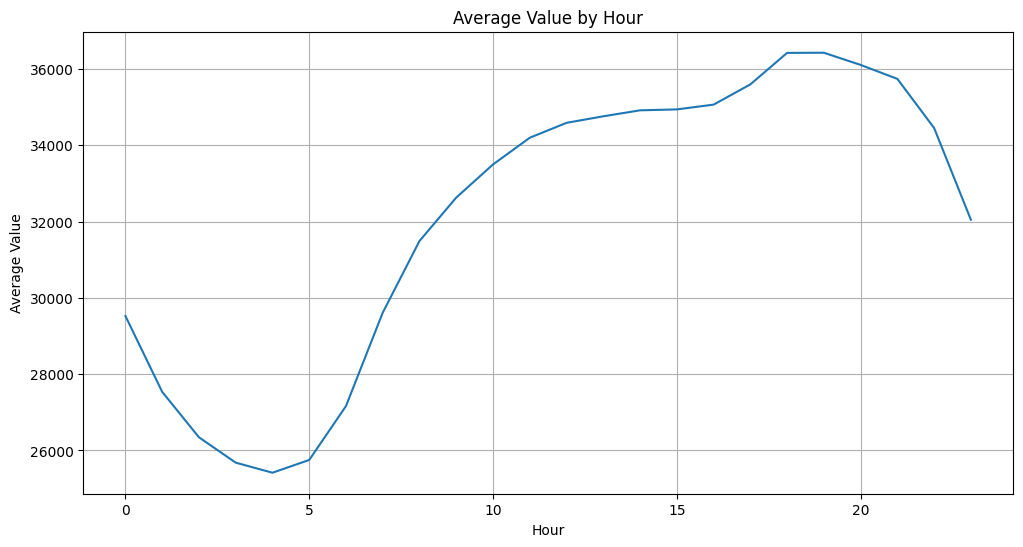

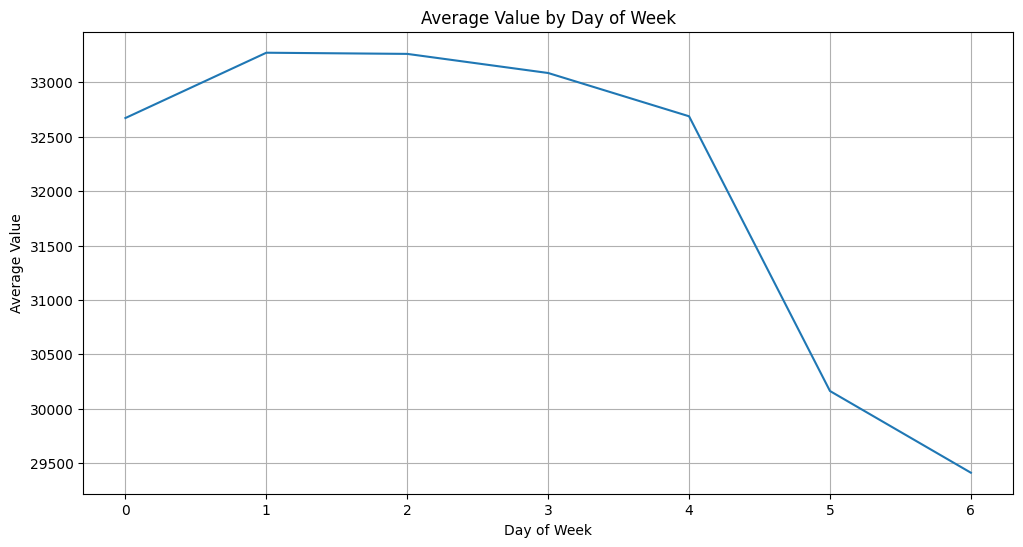

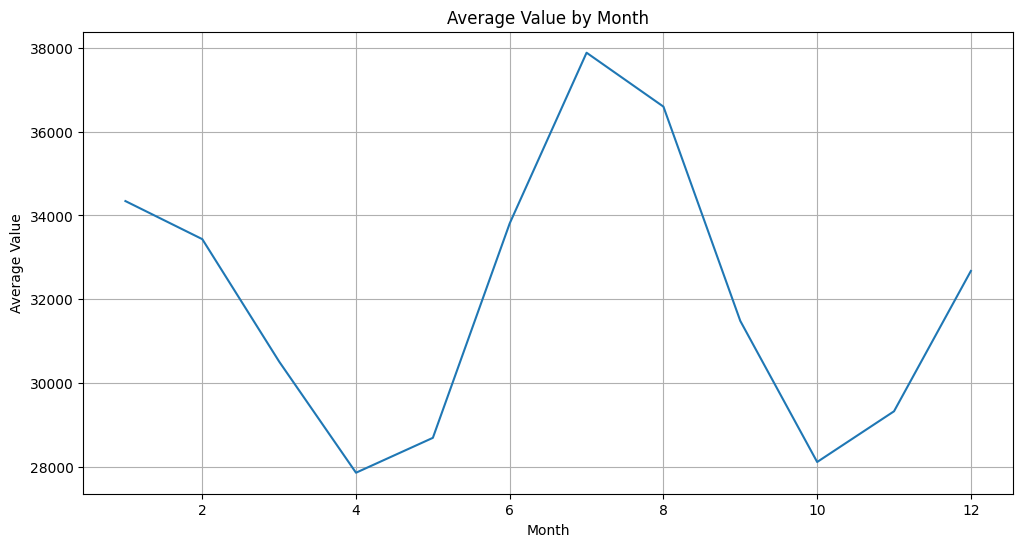

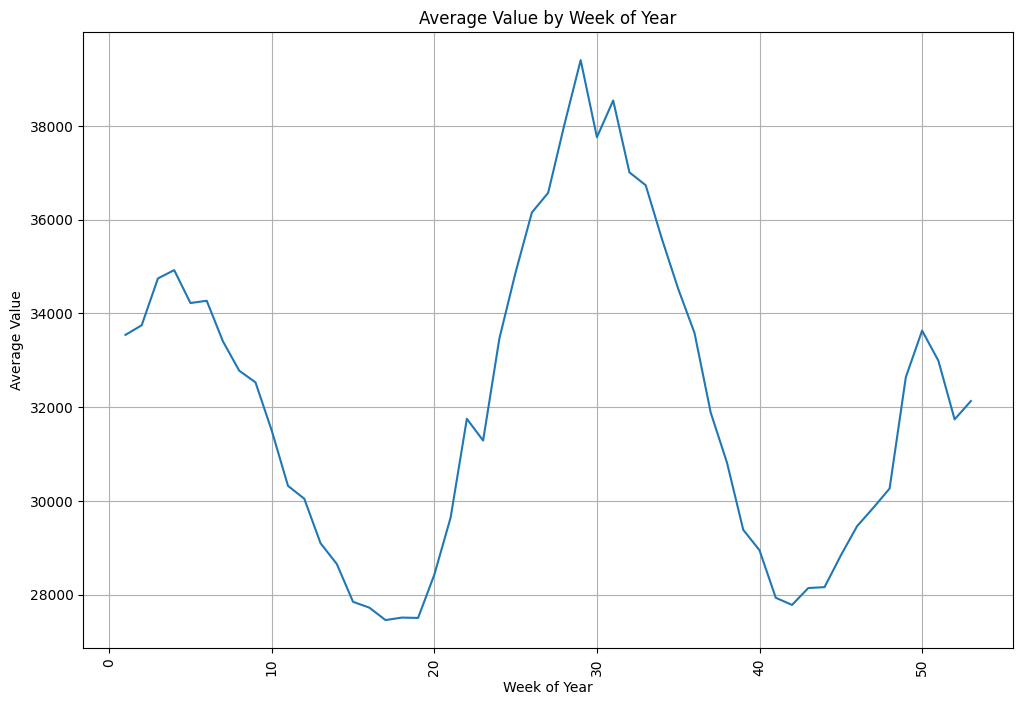

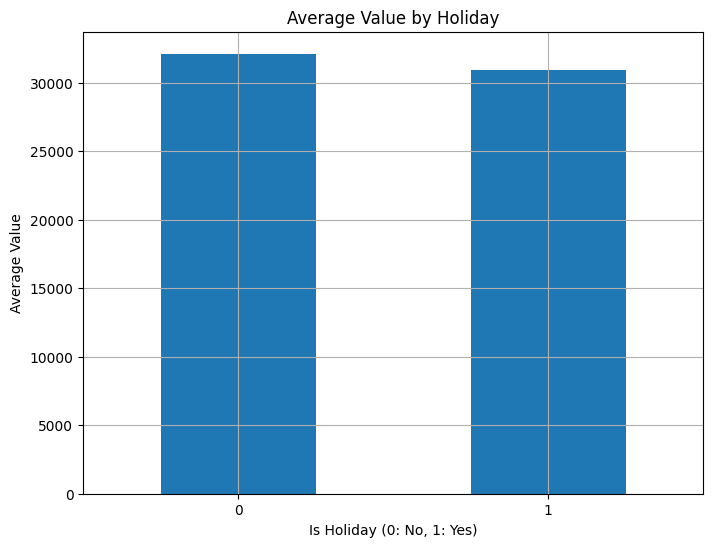

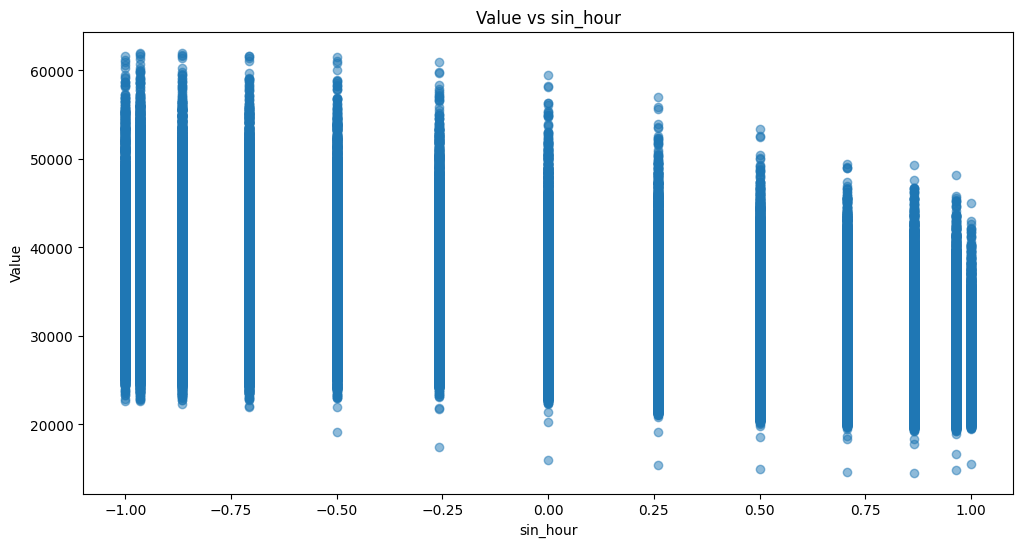

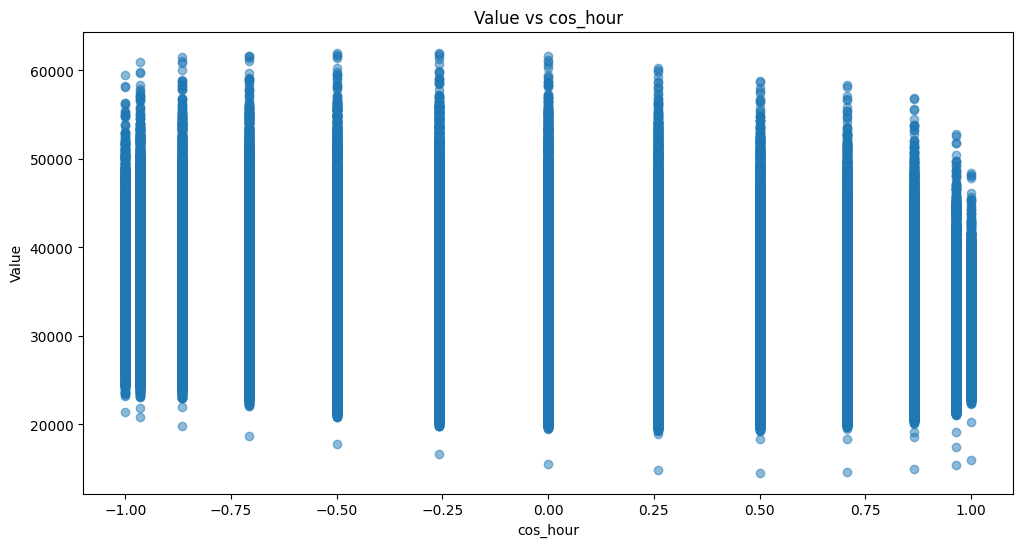

In [ ]:
df_features = (
    df
    .assign(hour = df.index.hour)
    .assign(day = df.index.day)
    .assign(month = df.index.month)
    .assign(day_of_week = df.index.dayofweek)
    .assign(week_of_year = df.index.isocalendar().week)
    .assign(is_holiday = df.index.to_series().apply(is_holiday))
)

# Plot mean value by hour
plt.figure(figsize=(12, 6))
df_features.groupby('hour')['value'].mean().plot()
plt.title('Average Value by Hour')
plt.xlabel('Hour')
plt.ylabel('Average Value')
plt.grid(True)
plt.show()

# Plot mean value by day of week
plt.figure(figsize=(12, 6))
df_features.groupby('day_of_week')['value'].mean().plot()
plt.title('Average Value by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Value')
plt.grid(True)
plt.show()

# Plot mean value by month
plt.figure(figsize=(12, 6))
df_features.groupby('month')['value'].mean().plot()
plt.title('Average Value by Month')
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.grid(True)
plt.show()

# Plot mean value by week of year
plt.figure(figsize=(12, 8))
df_features.groupby('week_of_year')['value'].mean().plot()
plt.title('Average Value by Week of Year')
plt.xlabel('Week of Year')
plt.ylabel('Average Value')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# Plot mean value by holiday
plt.figure(figsize=(8, 6))
df_features.groupby('is_holiday')['value'].mean().plot(kind='bar')
plt.title('Average Value by Holiday')
plt.xlabel('Is Holiday (0: No, 1: Yes)')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


df_features = generate_cyclical_features(df_features, 'hour', 24, 0)

plt.figure(figsize=(12, 6))
plt.scatter(df_features['sin_hour'], df_features['value'], alpha=0.5)
plt.title('Value vs sin_hour')
plt.xlabel('sin_hour')
plt.ylabel('Value')
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(df_features['cos_hour'], df_features['value'], alpha=0.5)
plt.title('Value vs cos_hour')
plt.xlabel('cos_hour')
plt.ylabel('Value')
plt.show()

## Interpretation

1. **Average Value by Hour Plot:**

* **What it shows:** This line plot displays the average electricity demand for each hour of the day (0 to 23) across the entire dataset.

* **Interpretation:** You would likely see a clear daily pattern. Demand is typically lower during the early morning hours, starts to increase as people wake up and businesses open, peaks during the day, and then decreases in the evening. This confirms the strong daily seasonality in the data.

2. **Average Value by Day of Week Plot:**

* **What it shows:** This line plot shows the average electricity demand for each day of the week (0 for Monday, 6 for Sunday).

* **Interpretation:**  You would likely observe differences in average demand between weekdays and weekends. Business days often have higher demand due to industrial and commercial activity, while weekends might show lower or different patterns.

3. **Average Value by Month Plot:**

* **What it shows:** This line plot displays the average electricity demand for each month of the year (1 to 12).

* **Interpretation:** This plot highlights the yearly seasonality. You would likely see higher average demand during months with extreme temperatures (e.g., summer for cooling, winter for heating) and lower demand in milder months.

4. **Average Value by Week of Year Plot:**

* **What it shows:** This line plot shows the average electricity demand for each week of the year (1 to 53).

* **Interpretation:** Similar to the monthly plot, this provides a more granular view of the yearly seasonality, showing how average demand fluctuates throughout the year on a weekly basis. You might see peaks corresponding to summer and winter periods.

5. **Average Value by Holiday Plot:**
* **What it shows:** This bar plot compares the average electricity demand on holidays (1) versus non-holidays (0).
* **Interpretation:** This plot directly shows the impact of holidays on electricity demand. I would likely see a noticeable difference in average demand on holidays compared to regular days, often lower due to reduced business and industrial activity.

6. **Value vs sin_hour Scatter Plot:**

* **What it shows:** This scatter plot visualizes the relationship between the sine transformation of the hour and the electricity demand.

* **Interpretation:** Due to the cyclical nature, you'll see a pattern that reflects the daily cycle, but mapped onto the sine wave. Points will cluster based on the time of day, showing how demand varies as the sine value changes throughout the 24-hour cycle.

7. **Value vs cos_hour Scatter Plot:**

* **What it shows:** This scatter plot visualizes the relationship between the cosine transformation of the hour and the electricity demand.
* **Interpretation:** Similar to the sin_hour plot, this will show the daily pattern mapped onto the cosine wave. The combination of the sin_hour and cos_hour plots provides a complete picture of the cyclical relationship between the hour and the demand, allowing the model to distinguish between different hours within the cycle.

**Overall Interpretation:**

These visualizations are crucial for understanding the individual impact and patterns associated with each engineered time-based feature on the target variable. They visually confirm the presence of daily, weekly, and yearly seasonality, as well as the impact of holidays. This understanding helps in feature selection and in choosing appropriate time series models that can effectively capture these relationships. The scatter plots for the cyclical hour features demonstrate how the sine and cosine transformations represent the cyclical nature of the hour, which is beneficial for the model.



## Correlation matrix of features



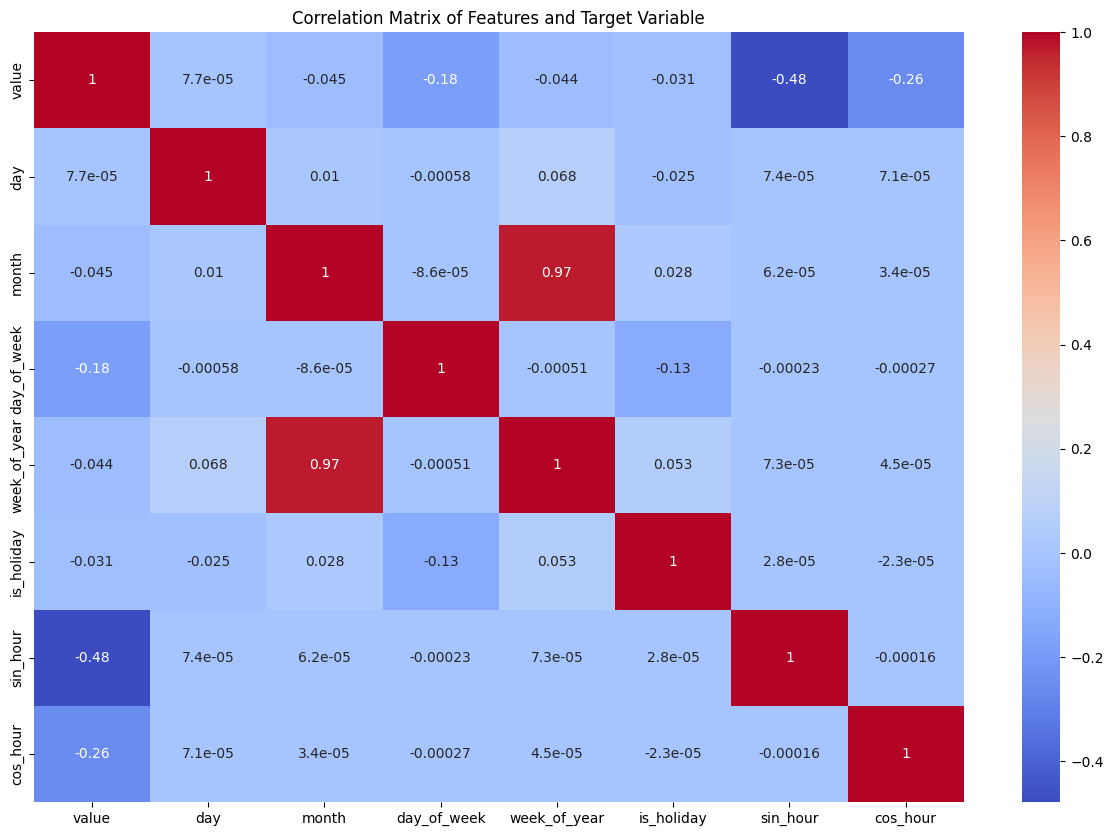

In [ ]:
import seaborn as sns

correlation_matrix = df_features.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features and Target Variable')
plt.show()

## Interpretation

1. **Correlation with the Target Variable (value):**

* **sin_hour (-0.478840):** There is a moderate negative correlation between sin_hour and value. This makes sense as the sine function of the hour goes from 0 to 1 and back to 0 over the first half of the day, then from 0 to -1 and back to 0 over the second half. Electricity demand typically peaks during the day when sin_hour is positive and lower during the night when sin_hour is negative, leading to a negative correlation.

* **cos_hour (-0.258455):** There is a weaker negative correlation between cos_hour and value. Similar to sin_hour, the cosine function's pattern throughout the day relates to the cyclical demand pattern.

* **day_of_week (-0.183058):** There is a weak negative correlation between the day of the week (which was likely encoded numerically before one-hot encoding in the visualization part) and the value. This aligns with the observation that demand might be lower on weekend days (higher numerical values if Monday is 0 and Sunday is 6) compared to weekdays.

* **month (-0.044522), week_of_year (-0.043897), day (0.000077):** These features show very weak linear correlations with the value. This doesn't mean they are not important predictors, especially after one-hot encoding. One-hot encoding captures non-linear relationships that a simple linear correlation coefficient might not reveal. The visualization plots for these features showed clear patterns, indicating their importance.

* **is_holiday (-0.030781):** There is a very weak negative correlation with is_holiday. While the average value plot showed a noticeable difference between holidays and non-holidays, the linear correlation is weak. This is because is_holiday is a binary feature, and the relationship might not be strictly linear across all data points, but the average difference is still significant for prediction.

2. **Correlation Between Features:**
* **month and week_of_year (0.970762):** As expected, there is a very high positive correlation between month and week_of_year. These two features capture very similar aspects of yearly seasonality, just at different granularities. This high correlation suggests potential multicollinearity if both features are used directly in a linear model, although in tree-based models or neural networks, it's usually less of an issue.

* **Other correlations between date/time features** These are generally low, which is good as it indicates they are capturing different aspects of the time variation.

* **Correlations between the original date/time features (day, month, etc.) and the cyclical features (sin_hour, cos_hour)** These are very close to zero. This is expected as these features represent different time scales and transformations.
Overall Interpretation:

3. **The correlation matrix**

* It provides a quantitative view of the linear relationships between your engineered features and the target variable, as well as the relationships between the features themselves. It confirms that:

  * Hourly patterns (sin_hour, cos_hour) have the strongest linear correlation with electricity demand among the time-based features.
  Daily and monthly periodicities are also reflected in the correlations, though less strongly in a linear sense for month, day, and week_of_year before one-hot encoding.

  * Holidays have some impact, as seen in the slight negative correlation, which aligns with the average value plot showing lower demand on holidays.

There is high multicollinearity between month and week_of_year, which is understandable given their nature.

This analysis helps in understanding which features have a strong linear association with the target and identifying potential issues like multicollinearity among features. It complements the visual analysis by providing numerical strength to the observed relationships.
